# Class of 2023 Data

## Preliminaries

This notebook is meant to document all my steps at matching the class of 2023. I want to be meticulous to communicate how and why I am assigning over 1700 cadets to their careers (I think it's a pretty important thing). Here we go...

In [1]:
import os

# Obtain initial working directory
dir_path = os.getcwd() + '/'
print('initial working directory:', dir_path)

# Get main afccp folder path
index = dir_path.find('afccp') 
dir_path = dir_path[:index + 6]

# Update working directory
os.chdir(dir_path)
print('updated working directory:', dir_path)

initial working directory: /Users/griffenlaird/Desktop/Coding Projects/afccp/afccp/executables/laird/
updated working directory: /Users/griffenlaird/Desktop/Coding Projects/afccp/


In [2]:
# Import the problem class
from afccp.core.problem_class import CadetCareerProblem

Running on Griffen's Macbook
Sensitive data folder not found.
Pyomo module found.


/Users/griffenlaird/opt/anaconda3/envs/afccp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SDV module found.
Sklearn Manifold module found.


In [3]:
# The filepath assumes there is an excel file in the correct folder pertaining to this problem instance
data_name = '2023'  # We only need to specify the data_name

# Create instance from this data. "printing" is optional and just prints progess updates
instance = CadetCareerProblem(data_name=data_name, printing=True)  
print('Full name:', instance.full_name)  # "data_type data_name". Main excel file name (can get more specific with solutions/vps)

Importing 2023 problem instance...
Imported.
Full name: Real 2023


## What does the data look like?

This part checks out some summaries of the data and visualizations of what the cadets look like this year

In [4]:
print("AFSCs this year:", instance.parameters["afsc_vector"])
print("Number of Cadets:", instance.parameters["N"])

AFSCs this year: ['13H' '13M' '13N' '14F' '14N' '15A' '15W' '17X' '21A' '21M' '21R' '31P'
 '32EXA' '32EXC' '32EXE' '32EXF' '32EXG' '32EXJ' '35P' '38F' '61C' '61D'
 '62EXA' '62EXB' '62EXC' '62EXE' '62EXG' '62EXH' '62EXI' '63A' '64P' '65F']
Number of Cadets: 1809


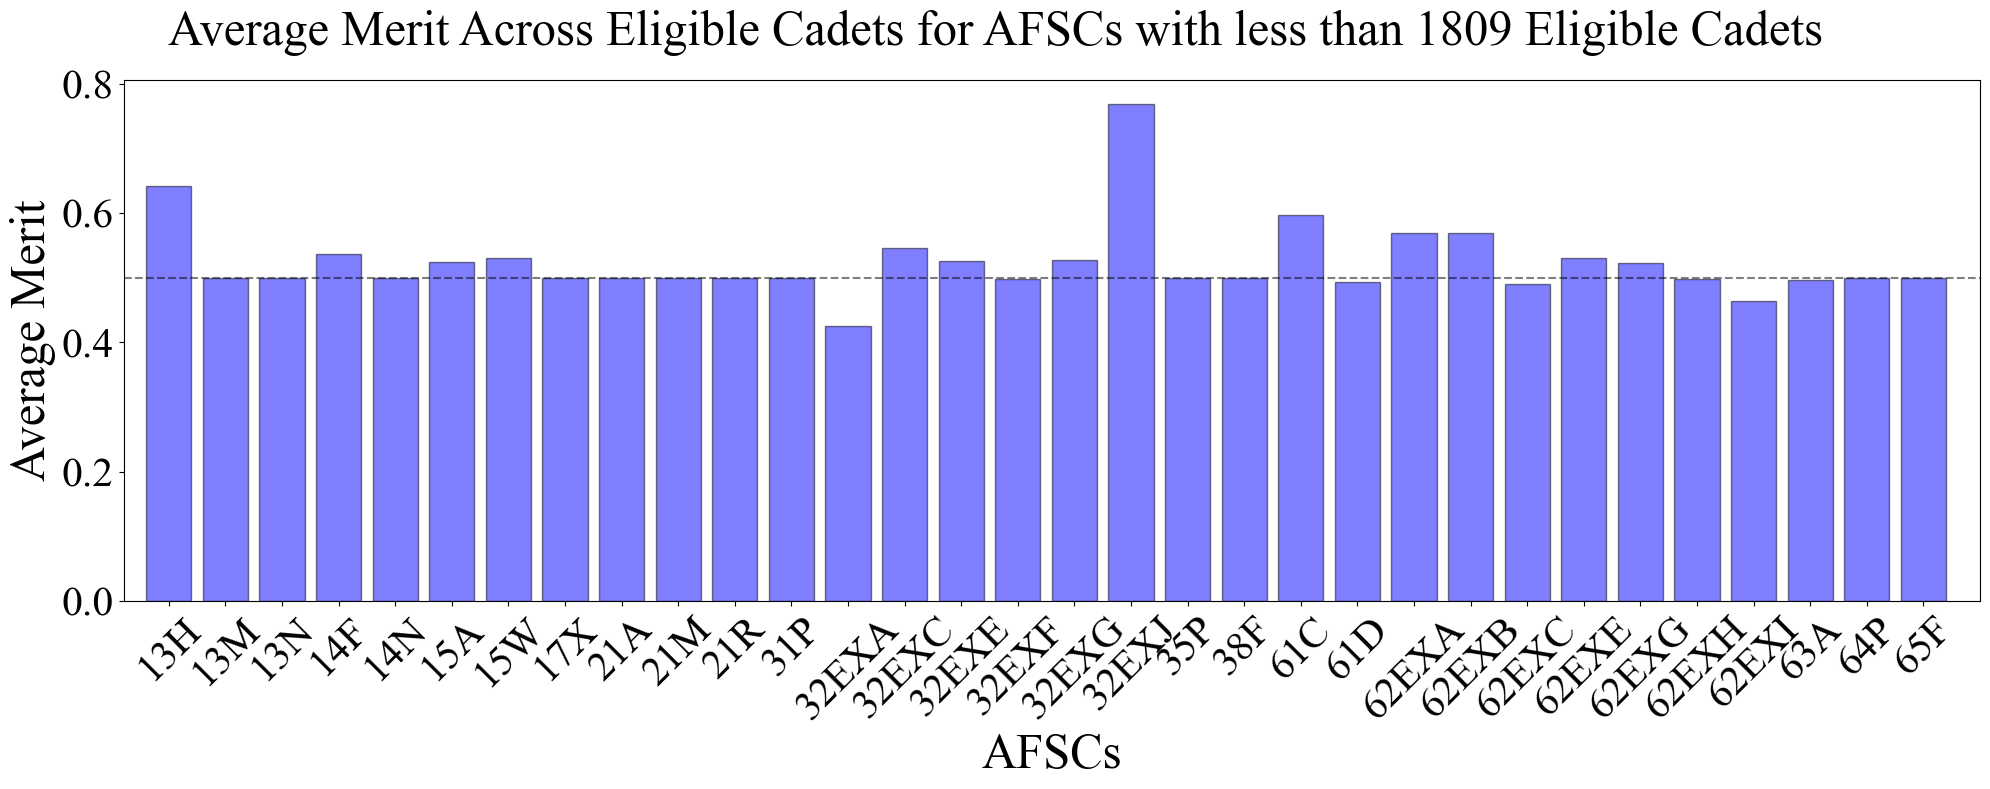

In [5]:
# Now let's show the data using one of our methods
figsize=(20, 8)  # For some reason the default (16, 10) just doesn't look great in this notebook
chart = instance.display_data_graph('Average Merit', bar_color='blue', figsize=figsize)

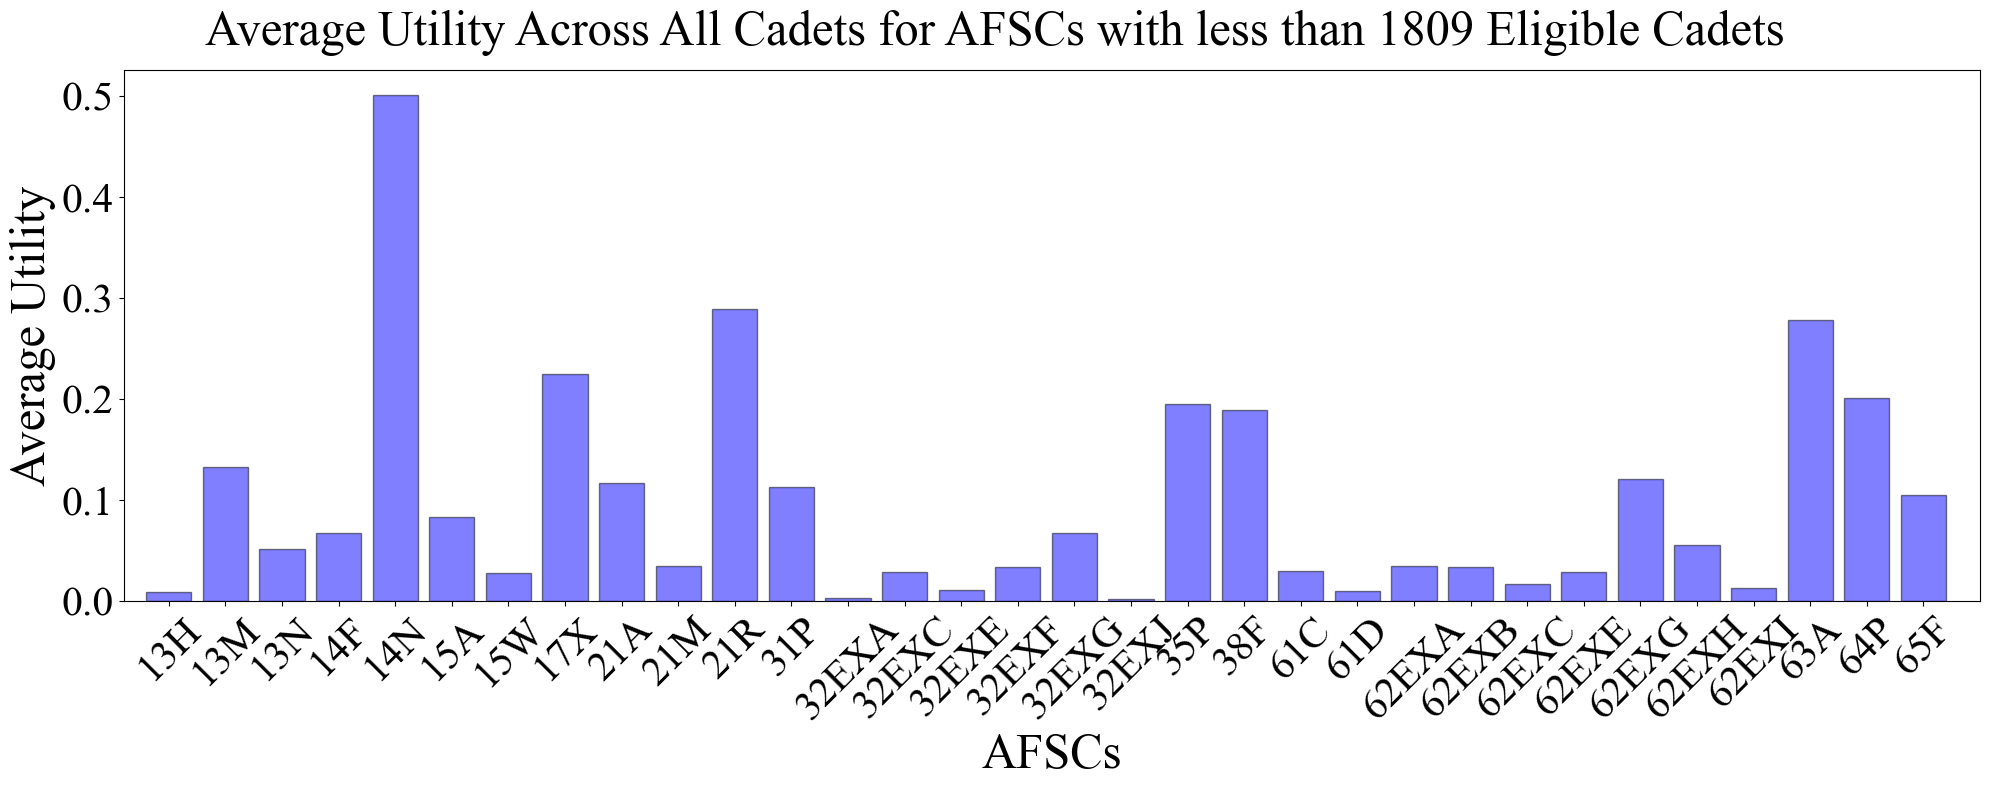

In [6]:
# We can look at the average utility placed on each of the AFSCs
chart = instance.display_data_graph('Average Utility', bar_color='blue', figsize=figsize)

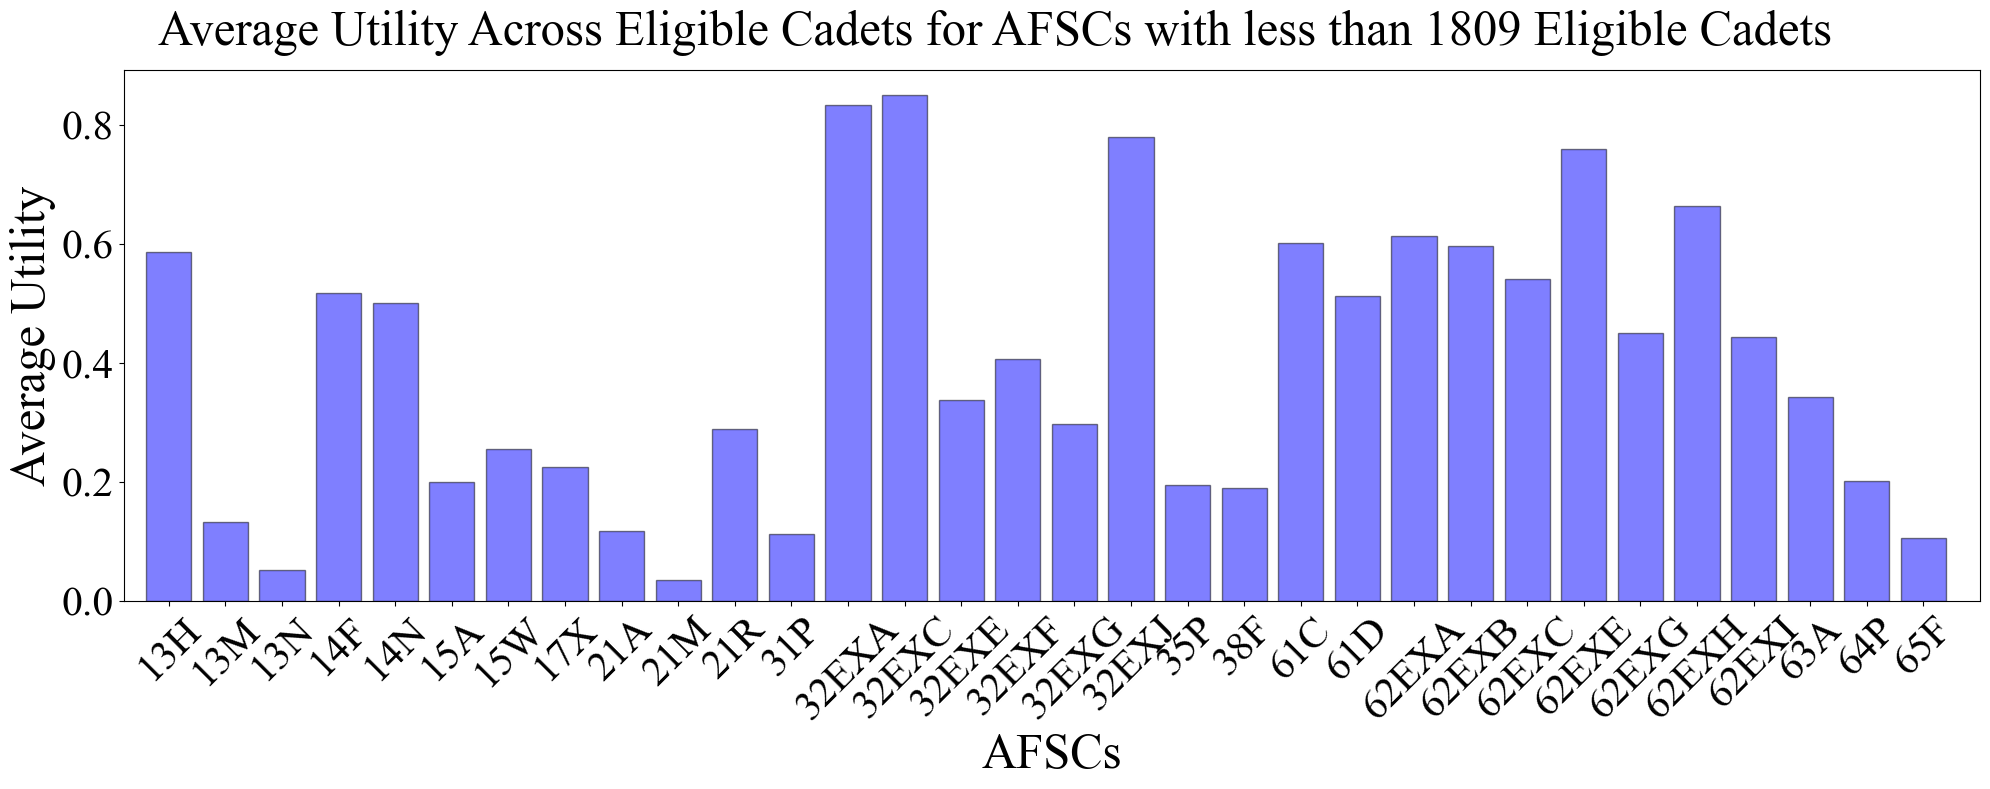

In [7]:
# We can also look at the average utility placed on each of the AFSCs of the set of eligible cadets for each AFSC
chart = instance.display_data_graph('Average Utility', bar_color='blue', eligibility=True, figsize=figsize) 

# This is probably more fair since most cadets aren't going to place preferences on AFSCs they're not eligible for
pass

In [8]:
# chart = instance.display_data_graph('USAFA Proportion', bar_color='blue', figsize=figsize) 

## Value Parameters!

Generate defaults (I spent some time curating 2023's defaults)

In [9]:
instance.import_default_value_parameters(num_breakpoints=24)
print(instance.vp_dict.keys())

Importing default value parameters...
Imported.
dict_keys(['VP', 'VP_2'])


### Value Functions

Let's start by viewing the value functions. Here's where I played around with different settings to get the value functions to look right for each of the AFSCs. 

Creating value function chart for objective Combined Quota for AFSC 15A...


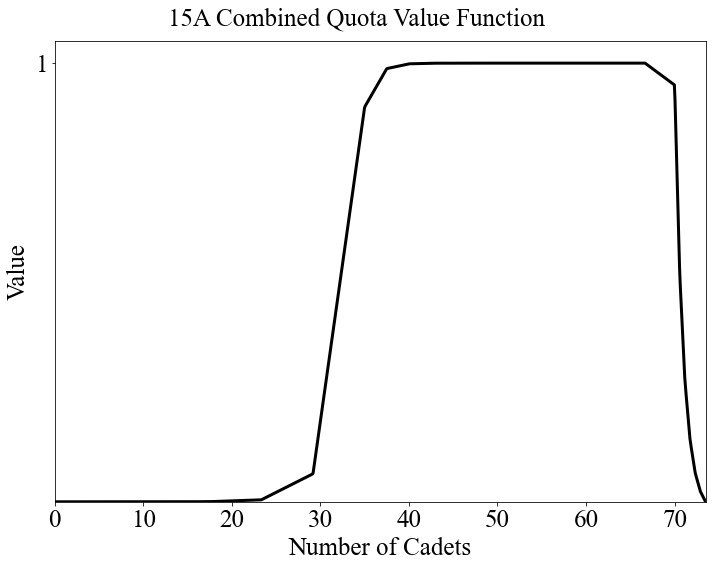

In [32]:
chart = instance.show_value_function(afsc="15A", objective="Combined Quota", figsize=(10, 8), save=True)

### Solutions

Let's just try out some other methods I have to find a solution

In [11]:
# Simplified stable marriage heuristic
instance.stable_matching()

Solving stable marriage model...
Measured exact solution vector objective value: 0.8098


array([18.,  7., 30., ...,  7., 25., 14.])

I don't get how we're at a 0.8242 objective value with the stable marriage thing (usually it's much lower). That's pretty neat!

In [12]:
instance.greedy_method()  # Greedy is also really high! Maybe cadets/AFSCs this year make sense?

Solving Greedy Model...
Measured exact solution vector objective value: 0.7723


array([ 4.,  7., 30., ...,  7., 25., 14.])

In [13]:
# For reference (random solutions don't do well)
instance.generate_random_solution(add_to_dict=False)  
print('current solutions:', instance.solution_dict.keys())

Generating random solution...
Measured exact solution vector objective value: 0.2724
current solutions: dict_keys(['A-VFT', 'Stable', 'Stable_2', 'Greedy'])


In [14]:
# instance.solve_vft_pyomo_model(max_time=10)

## Results

Let's compare solutions!

Measured exact solution vector objective value: 0.8671


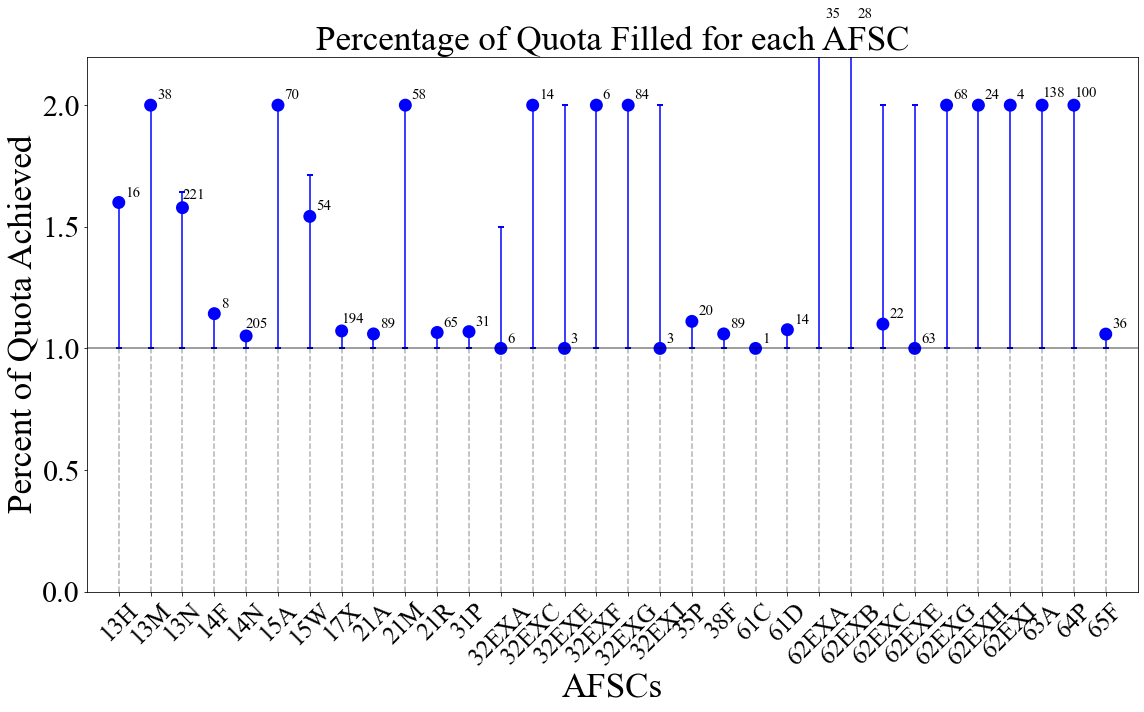

In [15]:
instance.set_instance_solution("A-VFT")
figsize = (16, 10)
chart = instance.display_results_graph("Combined Quota", figsize=figsize)

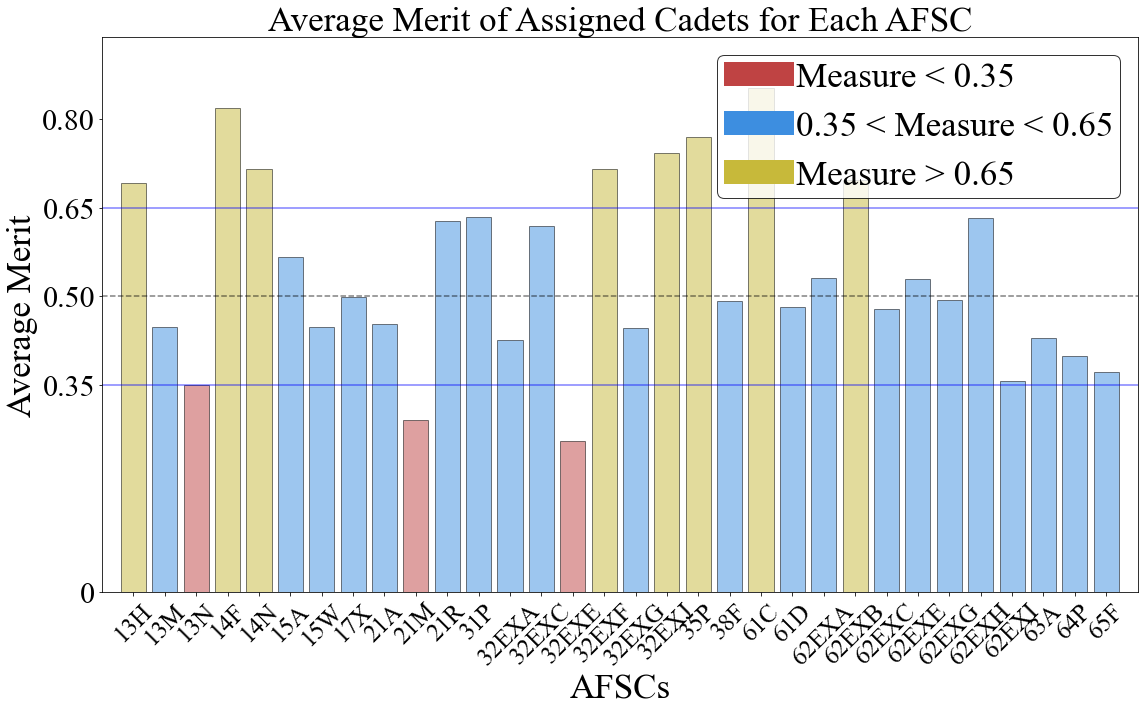

In [16]:
chart = instance.display_results_graph("Average Merit", figsize=figsize)

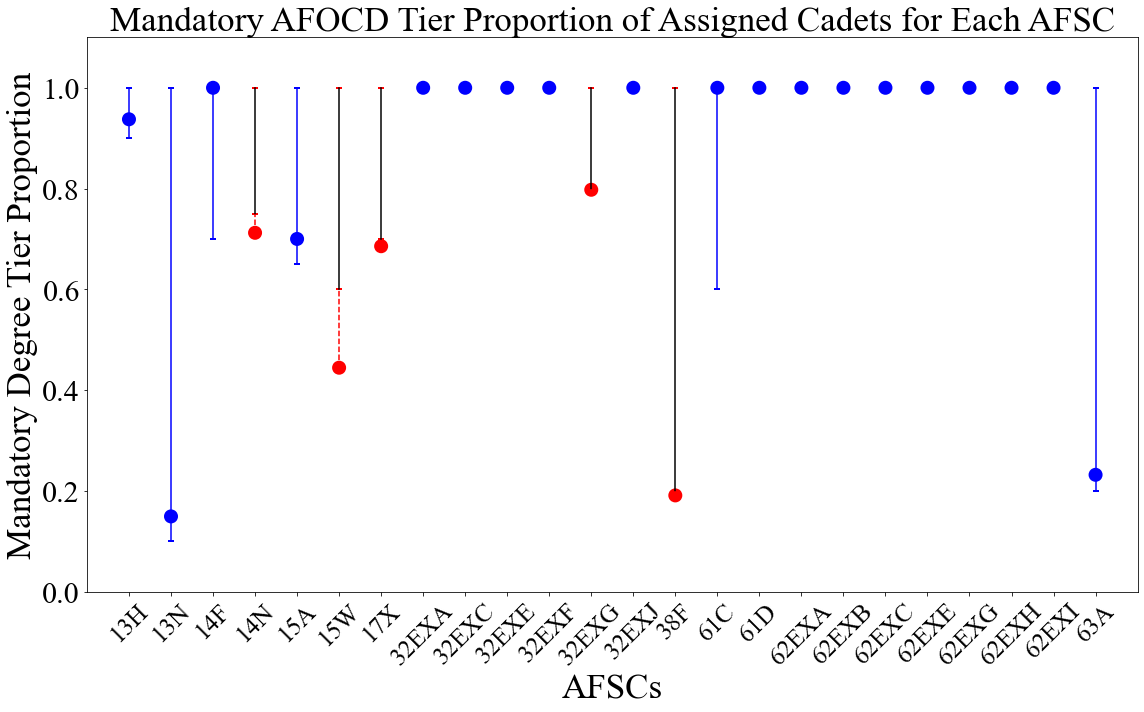

In [17]:
chart = instance.display_results_graph("AFOCD Proportion", degree="Mandatory", figsize=figsize)

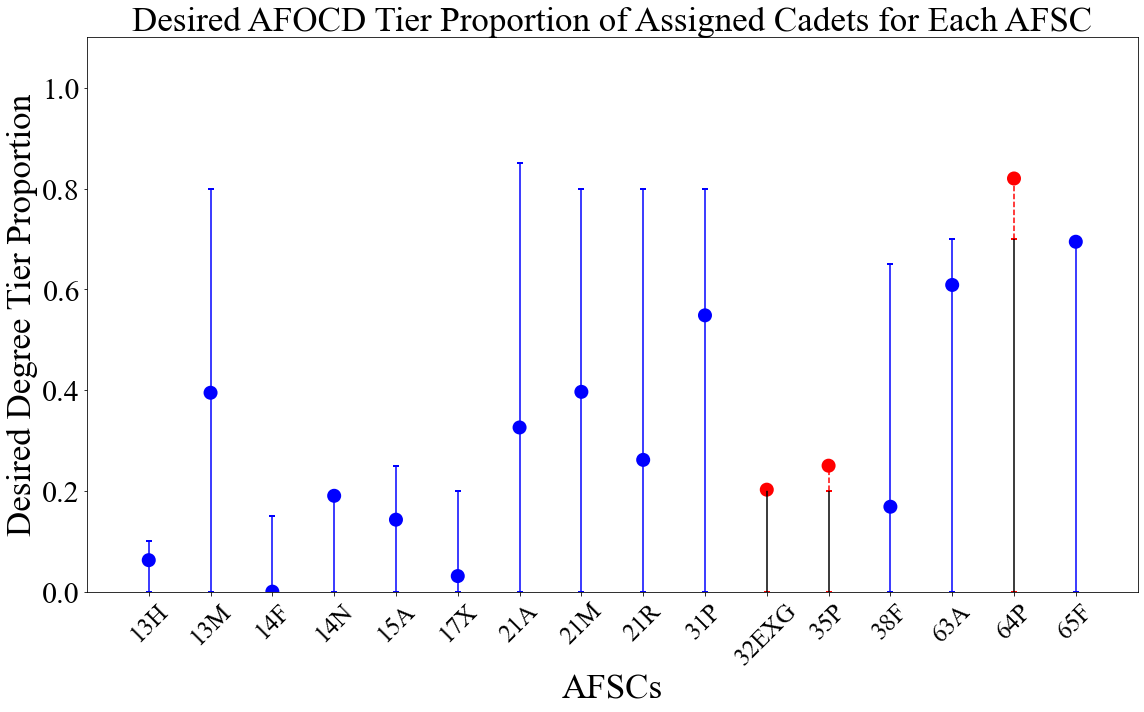

In [18]:
chart = instance.display_results_graph("AFOCD Proportion", degree="Desired", figsize=figsize)

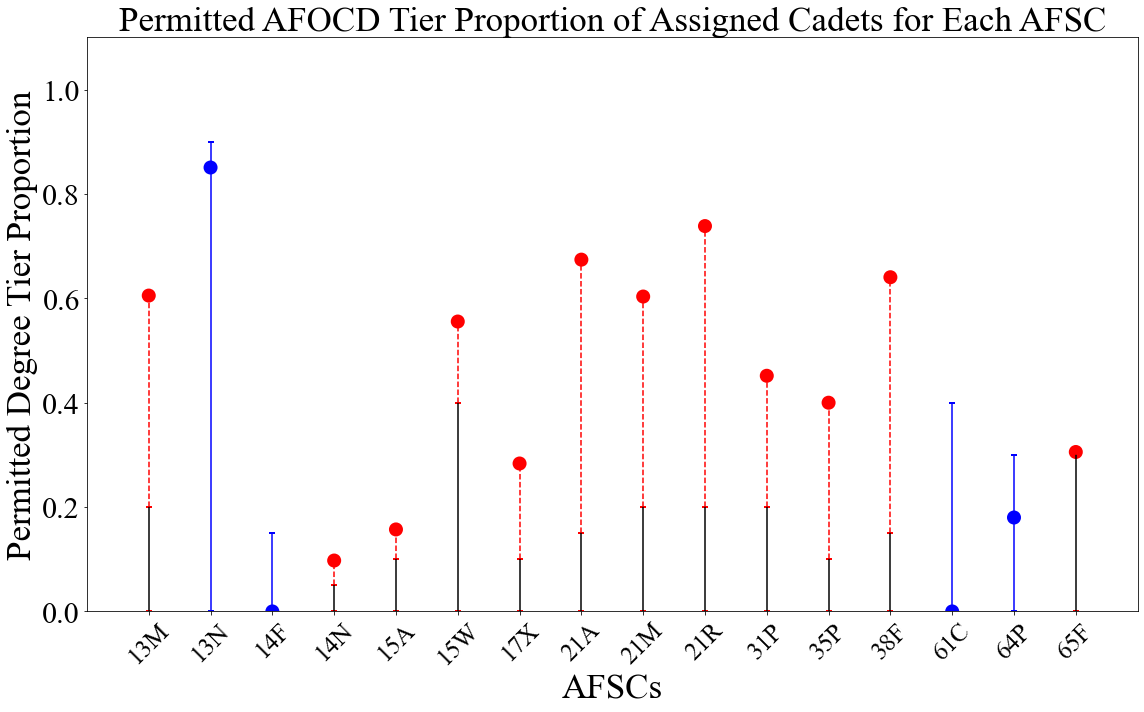

In [19]:
chart = instance.display_results_graph("AFOCD Proportion", degree="Permitted", figsize=figsize)

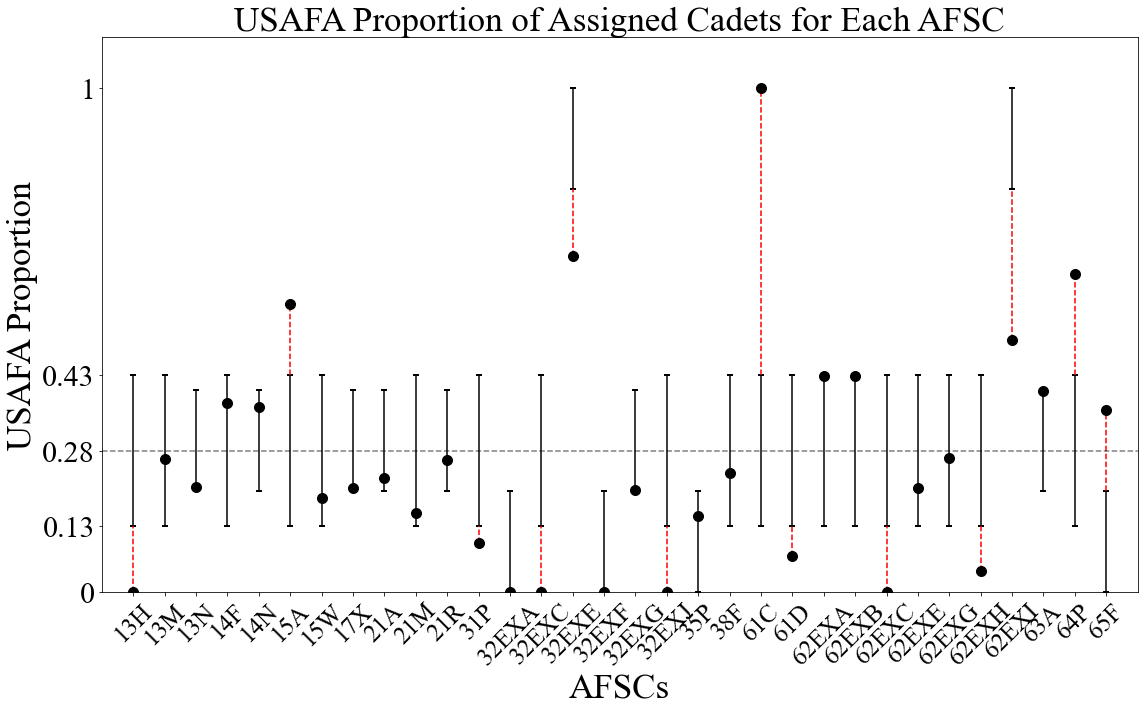

In [20]:
chart = instance.display_results_graph("USAFA Proportion", figsize=figsize)

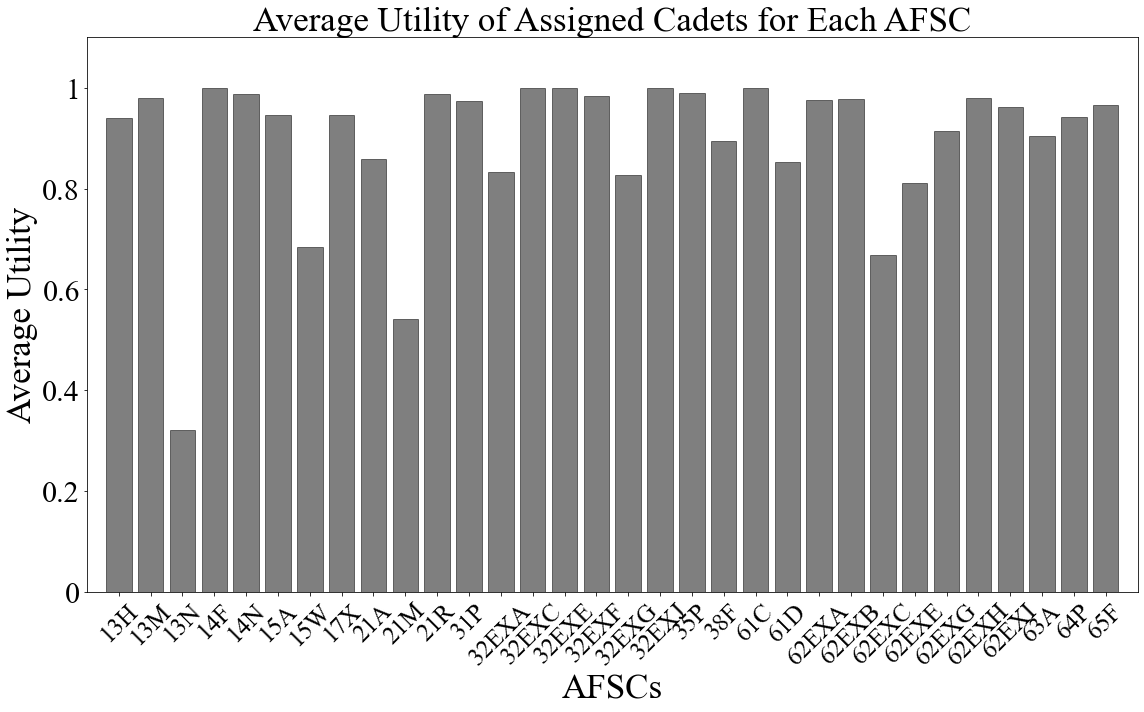

In [21]:
chart = instance.display_results_graph("Average Utility", figsize=figsize)

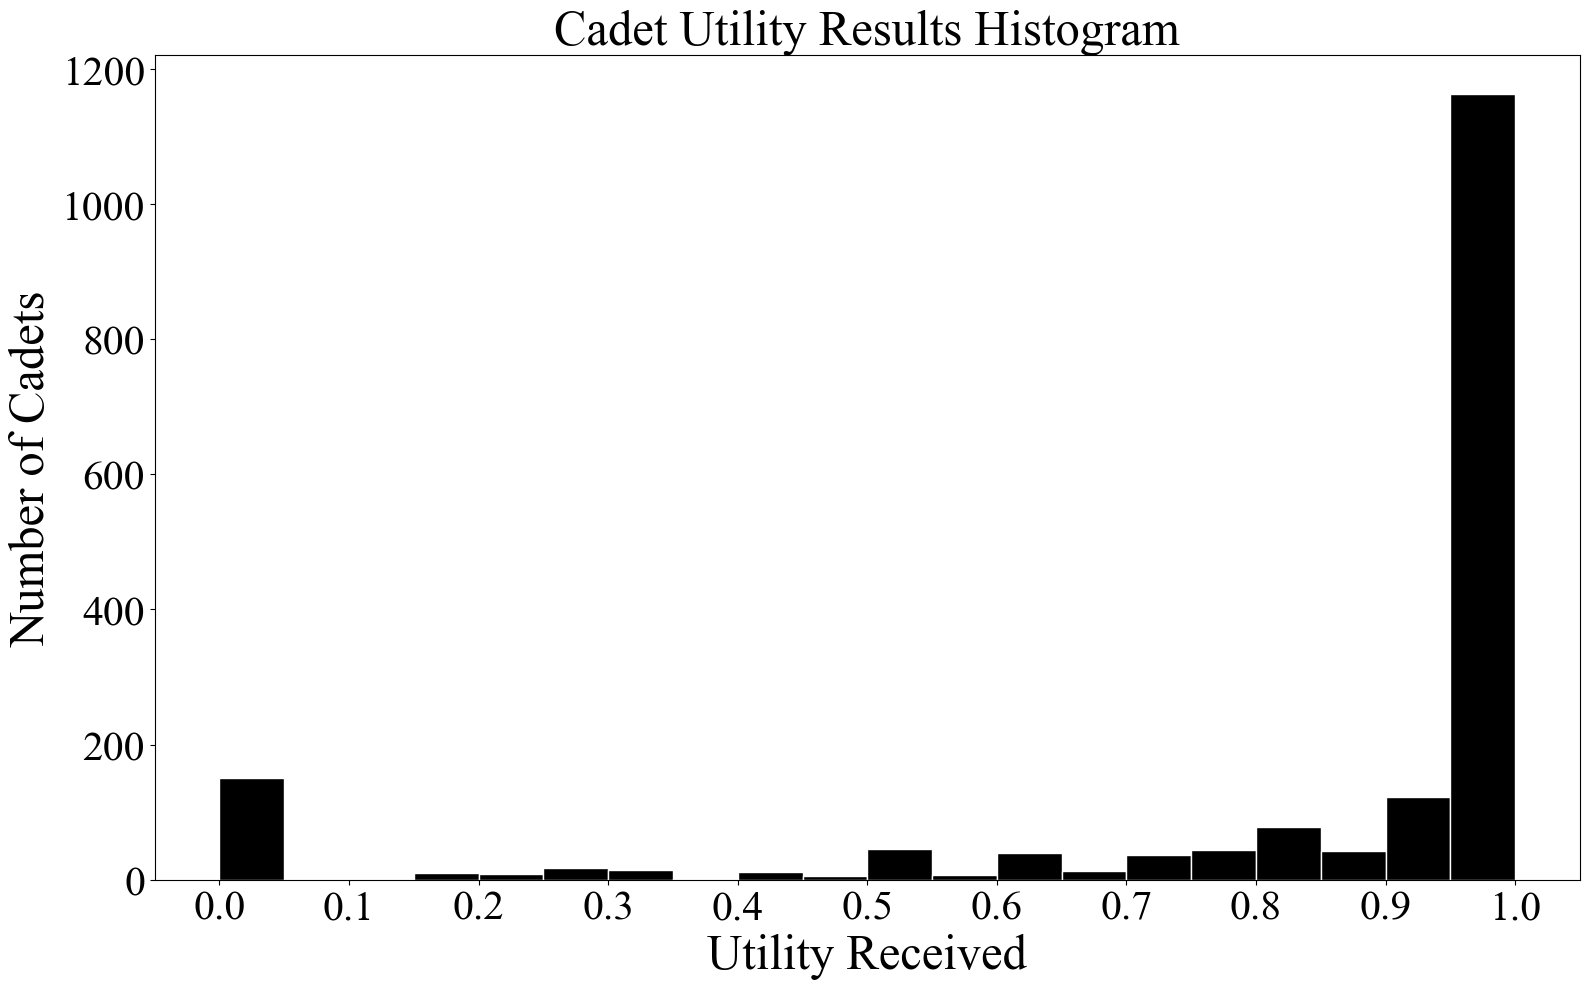

In [22]:
chart = instance.display_results_graph("Cadet Utility", figsize=figsize)

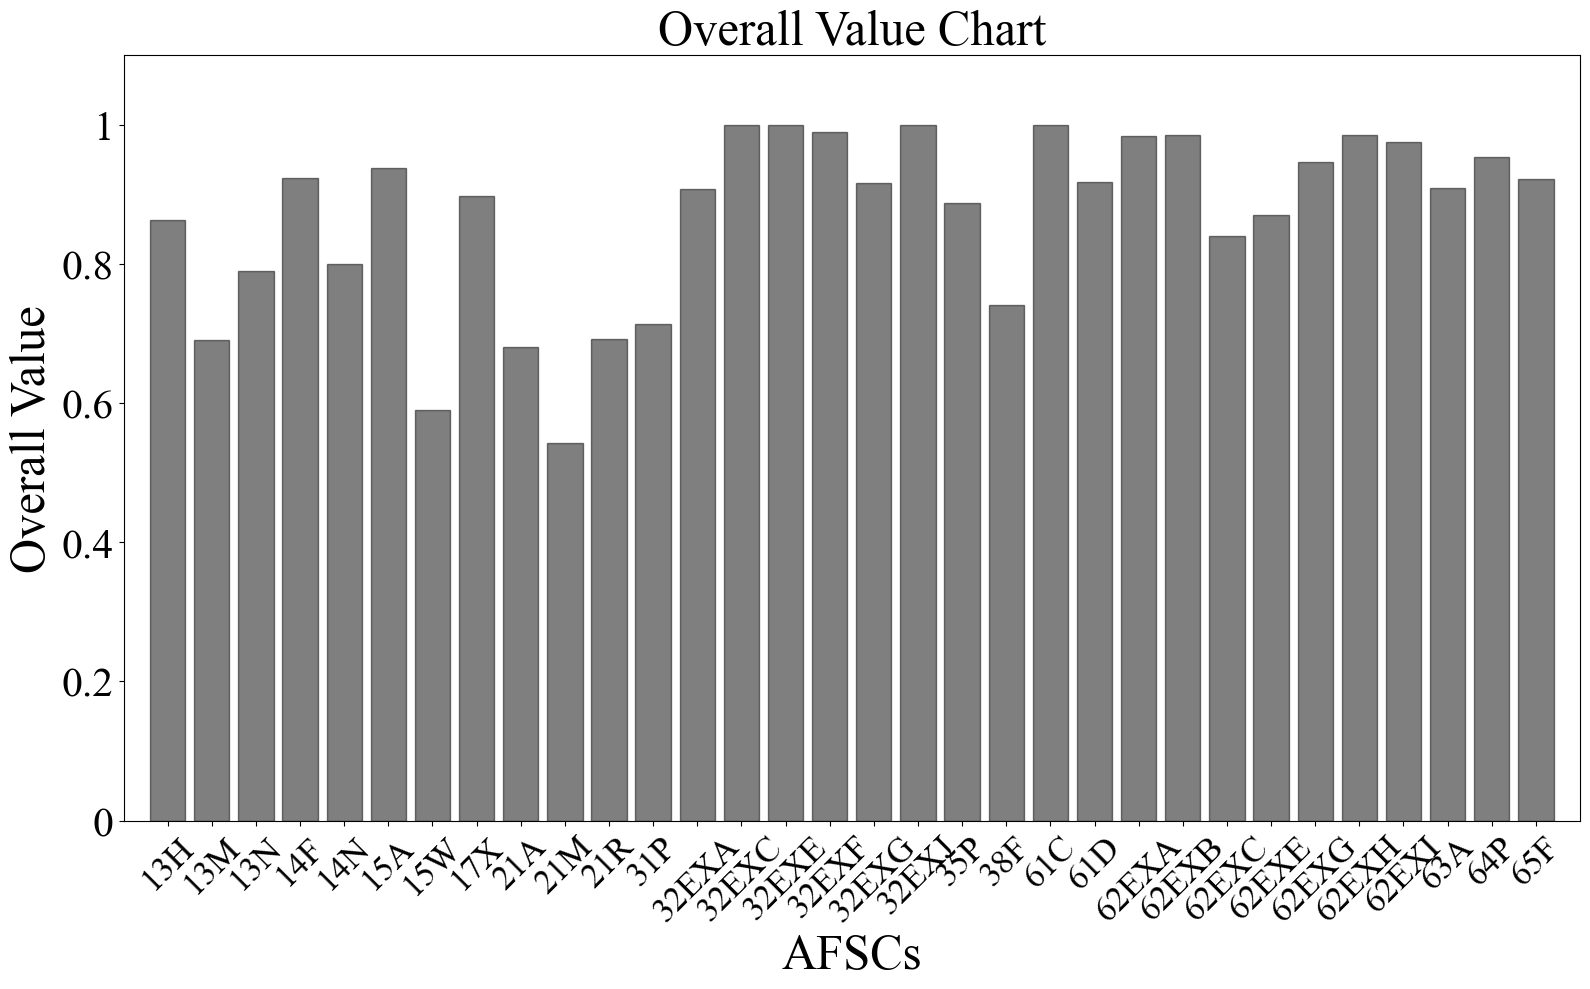

In [23]:
chart = instance.display_results_graph("AFSC Value", figsize=figsize)

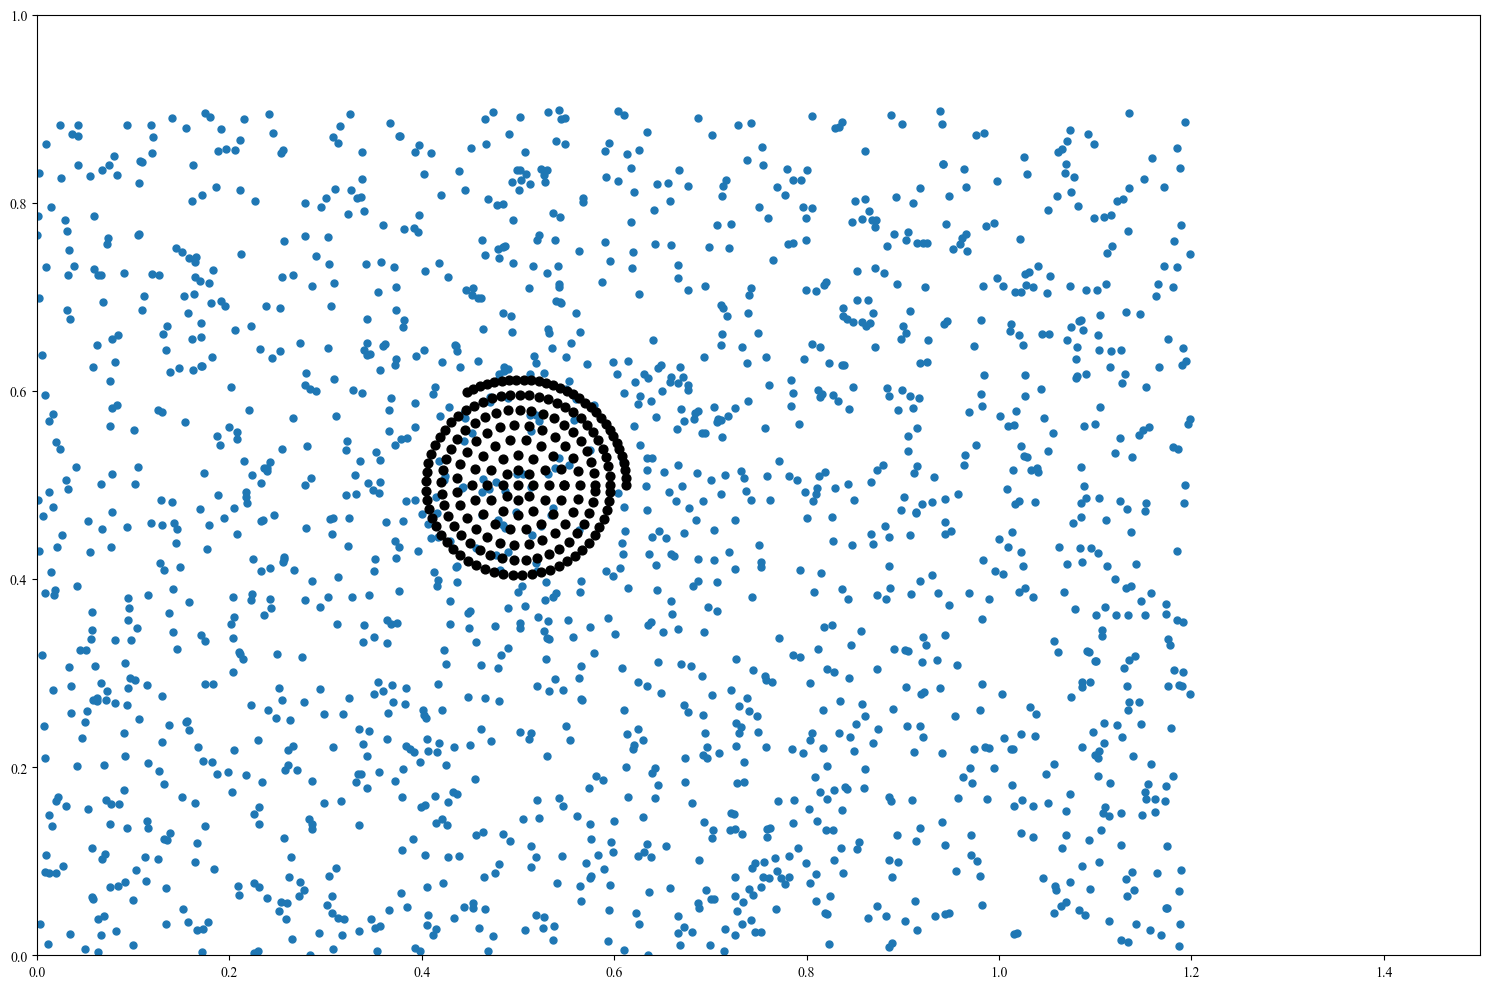

In [24]:
# Create figure
import matplotlib.pyplot as plt
import numpy as np
import random
import math
figsize = (15, 10)
fig, ax = plt.subplots(figsize=figsize, facecolor="white", tight_layout=True, dpi=100)

quota = instance.parameters['quota']
# print(quota)

# Gather coordinates
x = np.random.random(1700) * 1.2
y = np.random.random(1700) * .9

# # Plot cadets
ax.scatter(x,y, s=25)

# Remove tick marks
# ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

circle1 = plt.Circle((0.5, 0.5), 1.4, color='blue', fill=False)
ax.add_patch(circle1)

cadets = 200
x_r, y_r = 0.5, 0.5
x, y = x_r, y_r
rad, pos_adj, rad_adj = 0, 0.016, math.pi / 4
for i in range(cadets):
    if rad >= 2 * math.pi:
        rad = 0
        pos_adj += 0.016
        rad_adj = rad_adj / 1.5
        
    ax.scatter(x, y, s=40, c="black")
    x = x_r + pos_adj * math.cos(rad)
    y = y_r + pos_adj * math.sin(rad)
    rad += rad_adj
    
# Other Toggles
ax.set(xlim=(0, 1.5), ylim=(0, 1))

# Show figure
fig.show()

In [25]:
math.sin(math.pi/4)

0.7071067811865475

In [26]:
import numpy as np
x = np.array([[0.5, 0.5], [0.2, 0.8], [0.7, 0.3]])
y = np.array([0.2, 0.3, 0.5])
y = np.atleast_2d(y).T
scaled_weights = x * y

print('x', x)
print('y', y)
print('scaled', scaled_weights)

x [[0.5 0.5]
 [0.2 0.8]
 [0.7 0.3]]
y [[0.2]
 [0.3]
 [0.5]]
scaled [[0.1  0.1 ]
 [0.06 0.24]
 [0.35 0.15]]


In [27]:
M = 3
O = 2

flat = np.ndarray.flatten(scaled_weights)
indice_tuples = [(j, k) for j in range(M) for k in range(O)]
indice_tuples = np.array(indice_tuples)
sort_flat = np.argsort(flat)[::-1]
sorted_indices = indice_tuples[sort_flat]
# flat_indices = np.argsort(flat)[::-1]
# flat_tuples = flat_indice_tuples[flat_indices]
# print(flat_tuples)